<a href="https://colab.research.google.com/github/waessman/Auuxxx/blob/main/T2_Classical_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task \#2**: Machine Learning MC886/MO444
##**Classical Machine Learning Techniques**##

In [ ]:
print('Murilo Gomes da Silva' + ' 242233')
print('Gustavo Alberto de França Waessman' + '234726')

Murilo Gomes da Silva 242233
Gustavo Alberto de França Waessman234726


## Objective:

To explore **Linear Regression** and **Logistic Regression** alternatives and come up with the best possible model for the problems, at the same time avoiding overfitting (and also underfitting). In this work, we will train a model that use medical records from patients to predict patient survival.

## Dataset

The purpose of this dataset is to predict the patients' survival from medical records. These data is available in [Google Sheets](https://docs.google.com/spreadsheets/d/18-PlYBnwD7yJoyGJOsaB5Wydc2iTG9sSnbuuV4t4efE/edit?usp=sharing), consisting in 299 patients with heart failure collected in 2015. 

**Data Dictionary**:

- **AGE**: Age of the patient (years);

- **ANAEMIA**: Decrease of red blood cells or hemoglobin (boolean);

- **HIGH BLODD PRESSURE**: If the patient has hypertension (boolean);

- **CREATININE PHOSPHOKINASE (CPK)**: Level of the CPK enzyme in the blood (mcg/L);

- **DIABETES**: If the patient has diabetes (boolean);

- **EJECTION FRACTION**: Percentage of blood leaving the heart at each contraction (percentage);

- **PLATELETS**: Platelets in the blood (kiloplatelets/mL);

- **SEX**: Woman or man (binary);

- **SERUM CREATININE**: Level of serum creatinine in the blood (mg/dL);

- **SERUM SODIUM**: Level of serum sodium in the blood (mEq/L);

- **SMOKING**: If the patient smokes or not (boolean);

- **DEATH EVENT**: If the patient deceased during the follow-up period (boolean);

More information about the dataset: *Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_csv('heart_dataset.csv')




df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,No,582.0,No,20.0,1.0,265000.00,1.9,130.0,Female,No,1
1,55.0,No,7861.0,No,38.0,0.0,263358.03,1.1,136.0,Female,No,1
2,65.0,No,146.0,No,20.0,0.0,162000.00,1.3,129.0,Female,Yes,1
3,50.0,Yes,111.0,No,20.0,0.0,210000.00,1.9,137.0,Female,No,1
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1


### Analysis


(0.5 points) This part of the assignmente aims to analyze the dataset and preprocess the data for the models. To do so, a fews things to be considered: 


*   Are there any outliers?
*   Are there missing values?
*   How will you handle categorical variables?

In [ ]:
# TODO: Preprocessing Dataset.

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
    

df = pd.read_csv('heart_dataset.csv', converters = {"anaemia" : (lambda x : 0 if x == "No" else 1),"diabetes": (lambda x : 0 if x == "No" else 1), "sex" : (lambda x : 0 if x == "Female" else 1), "smoking": (lambda x : 0 if x == "No" else 1) }, na_values="NA")
df.fillna(df.mean(), inplace=True)
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.000000,0,582.0,0,20.0,1.0,265000.00,1.9,130.0,0,0,1
1,55.000000,0,7861.0,0,38.0,0.0,263358.03,1.1,136.0,0,0,1
2,65.000000,0,146.0,0,20.0,0.0,162000.00,1.3,129.0,0,1,1
3,50.000000,1,111.0,0,20.0,0.0,210000.00,1.9,137.0,0,0,1
4,60.946895,1,160.0,1,20.0,0.0,327000.00,2.7,116.0,1,0,1


## Linear Regression

(0.75 points) This part of the assigment aims to predict the level of serum creatinine in the blod based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: serum_creatinine**.

Obs: drop the DEATH_EVENT column.

In [ ]:
# TODO: Split data and normalize. You can use scikit-learn libraries.
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["serum_creatinine", "DEATH_EVENT"]) #Separando dados de entrada(pontos)
y = df.filter(items = ["serum_creatinine"]) #Separando labels de cada ponto

X_train, X_testVal, y_train, y_testVal = train_test_split(X, y, test_size = 0.3, random_state = 42)#Separando a entrada entre treinamento e "teste e validação"(juntos)

X_val, X_test, y_val, y_test = train_test_split(X_testVal, y_testVal, test_size = 0.5, random_state = 42)#Separando "teste e validação" em dois conjuntos distintos

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking
154,65.0,1,335.0,0,35.0,1.0,235000.0,136.0,1,0
42,70.0,0,571.0,1,45.0,1.0,185000.0,139.0,0,1
9,80.0,1,123.0,0,35.0,1.0,388000.0,133.0,0,1
108,63.0,0,936.0,0,38.0,0.0,304000.0,133.0,0,1
111,55.0,0,60.0,0,35.0,0.0,228000.0,135.0,0,1


### Activities

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) to check the importance of each feature. 

> *   Do we need all the features to predict the target value?
> *   What happens if we drop the low correlation features?

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# TODO: Feature selection.
#correlations = mutual_info_regression(df, );

> What are the conclusions? (1-2 paragraphs)

2. (2.0 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org).

In [ ]:
## TODO: MSE Loss. You cannot use scikit-learn!!
def MSE(Y, X, w, n):
  sum = 0
  for i in range(n):
    pred = 0;
    for j in range(len(X[i])):
        pred += X[i][j]*w[j];
    sum += (Y[i] - pred)**2;
  mse = sum/n;
  return mse;
Y_true = [12.5, 12.5, 1.5, 10.5];
X = [[2.5, 0, 2, 8], [2.5, 0, 2, 8], [2.5, 0, 2, 8], [2.5, 0, 2, 8]];
w = [1, 1, 1, 1];
n = 4;

print(MSE(Y_true, X, w, n));

31.25


In [ ]:
# TODO: Linear Regression. Implement yout solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!
class LinearRegression():
  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None

  def predict(self, X): #Provisório, pode estar tudo errado
    n = len(X);
    Y = [];
    for i in range(n):
        yi = self.bias;
        for j in len(X[i]):
            yi += X[i][j]*self.weights[j];
        Y.append(yi);
    return Y;

  def fit(self, X, y):
    return None

In [ ]:
# TODO: Linear Regression. You can use scikit-learn libraries.
from sklearn.linear_model import SGDRegressor

> What are the conclusions? (1-2 paragraphs)

3. (0.5 points) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

> What are the conclusions? (1-2 paragraphs)

4. (0.75 points) Use different learning rates when optimizing the model. You can use the model that you implemented or the model from scikit-learn.

> If you prefer to use the SGDRegressor from scikit-learn, use the parameter ```learning_rate='constant'``` and change the ```eta0```.

In [ ]:
# TODO: Different learning rates. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)

5. (0.5 points) Sometimes, we need some more complex function to make good prediction. Evaluate a [Polynomial Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) model. 

In [ ]:
# TODO: Complex model. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)

6. (0.5 points) Pick **your best model**, based on your validation set, and predict the target values for the test set.

In [ ]:
# TODO: Plot the true label and the predict label

## Logistic Regression

This part of the assigment aims to predict the patients survival based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: DEATH EVENT**.

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_classification](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) to check the importance of each feature.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

df = pd.read_csv('heart_dataset.csv', converters = {"anaemia" : (lambda x : 0 if x == "No" else 1),"diabetes": (lambda x : 0 if x == "No" else 1), "sex" : (lambda x : 0 if x == "Female" else 1), "smoking": (lambda x : 0 if x == "No" else 1) }, na_values="NA")
df.fillna(df.mean(), inplace=True)
df.head(5)

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

importancia = mutual_info_classif(X, y)

for feature, score in zip(X.columns, importancia):
    print(feature, score)



age 0.04753853618448023
anaemia 0.02778792257235363
creatinine_phosphokinase 0.02935217886263164
diabetes 0.0
ejection_fraction 0.08284669172310943
high_blood_pressure 0.0
platelets 0.0
serum_creatinine 0.08433619382289814
serum_sodium 0.004333522767374198
sex 0.013245388303771755
smoking 0.0


> What are the conclusions? (1-2 paragraphs)

Rodando o teste algumas vezes (Com sementes diferentes para a aleatoriedade), pode-se notar que algumas features como "diabetes, sex, platelets e smoking" sempre tiveram um valor muito próximo de 0.0 (O mesmo teste foi feito usando um scaler para normalizar os dados, e os resultados foram análogos), portanto,  podem ser candidatas a ser removidas da análise de modo geral, sem muita perda de precisão caso seja necessário.

2. (2 points) Perform Multinomial Logistic Regression.

In [ ]:
# TODO: Logistic Regression. You can use scikit-learn libraries.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
  
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.91      0.77        53
           1       0.72      0.35      0.47        37

    accuracy                           0.68        90
   macro avg       0.69      0.63      0.62        90
weighted avg       0.69      0.68      0.65        90



> What are the conclusions? (1-2 paragraphs)

De modo geral, o modelo apresentou resultados não muito satisfatórios, pode-se supor que tenha acontecido algo como overfitting no conjunto de treinamento.

Pelo resultado baixo do recall na classe 1, o modelo está com muita dificuldade em identificar exemplos da classe positiva, ele tem uma tendência a classificar tudo como negativo, o que pode estar ocorrendo, devido ao conjunto de dados possuir mais resultados classe 0 do que classe 1.

3. (1.5 points) Another factor that can alter the model result it's if the dataset is balanced:

*   The dataset is balanced ?
*   In this case, which technique is better: *oversampling* or *undersampling*?

Obs: You can use [RandomOverSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) and [RandomUnderSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler). But you can try others techniques.

In [ ]:
# TODO: Oversampling. You can use scikit-learn and imblearn libraries.
from imblearn.over_sampling import RandomOverSampler

X_resampled, y_resampled = RandomOverSampler(random_state=42).fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        57
           1       0.80      0.72      0.76        65

    accuracy                           0.75       122
   macro avg       0.76      0.76      0.75       122
weighted avg       0.76      0.75      0.75       122



In [ ]:
# TODO: Undersampling. You can use scikit-learn and imblearn libraries.
from imblearn.under_sampling import RandomUnderSampler

X_resampled, y_resampled = RandomUnderSampler(random_state=42).fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        28
           1       0.73      0.73      0.73        30

    accuracy                           0.72        58
   macro avg       0.72      0.72      0.72        58
weighted avg       0.72      0.72      0.72        58



> What are the conclusions? (1-2 paragraphs)

Devido ao modelo original apresentar recall muito baixo para uma das classes, podíamos imaginar que o modelo sofria por ter uma discrepância alta entre classes 0 e 1. 

Após ver os resultados do undersampling, pudemos notar que o problema do recall, foi amenizado, porém, no oversampling os resultados foram melhores. Ambas as abordagens são boas, pois a discrepância entre as classes não é tão grande assim, porém, nosso conjunto de dados não é muito grande. Portanto, devido a termos relativamente poucos dados, o melhor a se fazer realmente é o oversampling, mas tomando cuidado para não causar overfitting.



4. (0.5 points) Pick **your best model** and plot the confusion matrix in the **test set**. 


              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.78      0.76      0.77        41

    accuracy                           0.77        82
   macro avg       0.77      0.77      0.77        82
weighted avg       0.77      0.77      0.77        82



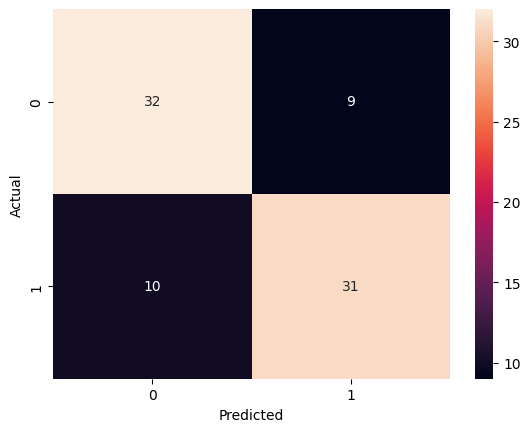

In [ ]:
import seaborn as sn
from sklearn.model_selection import GridSearchCV


def plot_confusion_matrix(y, y_pred):
    """
    This function receives a set of real labels y[i], a set
    of predictions y_pred[i] and print on stdout the confusion
    matrix for those values.
    """
    data = {'y': y, 'y_pred': y_pred}
    df = pd.DataFrame(data, columns=['y','y_pred'])
    cm = pd.crosstab(df['y'], df['y_pred'], rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(cm, annot=True)


df = pd.read_csv('heart_dataset.csv', converters = {"anaemia" : (lambda x : 0 if x == "No" else 1),"diabetes": (lambda x : 0 if x == "No" else 1), "sex" : (lambda x : 0 if x == "Female" else 1), "smoking": (lambda x : 0 if x == "No" else 1) }, na_values="NA")
df.fillna(df.mean(), inplace=True)
df.head(5)

#removendo features pouco importantes
cols_to_remove = ["diabetes", "sex", "platelets", "smoking"]
df.drop(cols_to_remove, axis=1, inplace=True)


X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Cria conjunto de hiperparâmetros a serem testados
param_grid = {'C': np.logspace(-5, 5, 11), 'penalty': ['l2']}


#faz o oversampling dos dados
X_resampled, y_resampled = RandomOverSampler(random_state=42).fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#normaliza os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#tuna os hiperparametros da regressão logistica
model = LogisticRegression(multi_class='multinomial')

model_cv = GridSearchCV(model, param_grid, scoring='f1')

model_cv.fit(X_train, y_train)

model = LogisticRegression(**model_cv.best_params_)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
  
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred)

> What are the conclusions? (1-2 paragraphs)

Durante a montagem deste melhor modelo, foi possível ver na prática o funcionamento dos diversos tipos de tratamento de dados que vimos em aula, como o feature selection, (mesmo que neste caso não estivesse ocorrendo overfitting), o oversampling devido a nosso conjunto de dados não estar balanceado, e a tunagem dos hiperparâmetros para a regressão logística.

Porém, mesmo com todos esses cuidados, o resultado ainda não foi totalmente satisfatório, easdasdasd


## Deadline

Wednesday, April 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- April 20, 11:59 pm : grade * 0.75
- April 21, 11:59 pm : grade * 0.5
- April 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**